# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [2]:
# Читаем CSV-файл и указываем, что первый столбец нужно использовать как индекс (index_col=0)
df = pd.read_csv('Data/Advertising 2.csv', index_col=0)

# Выводим первые 5 строк датафрейма
print(df.head(5))
print()
# Выводим общую информацию о датафрейме
print(df.info())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


# Признаки:

Реклама размещенная в разных источниках

- TV - продажи на телевидении
- radio - продажи на радио
- newspaper - продажи в газете
- sales - целевой признак

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [3]:
print(f'Количество пропусков в данных: {df.isnull().sum().sum()}\n')
print(f'Количество дубликатов в данных: {df.duplicated().sum()}')

Количество пропусков в данных: 0

Количество дубликатов в данных: 0


Дополнительно решил добаить матрицу корреляций для того, чтобы убедиться, что все признаки подходят.

<Axes: >

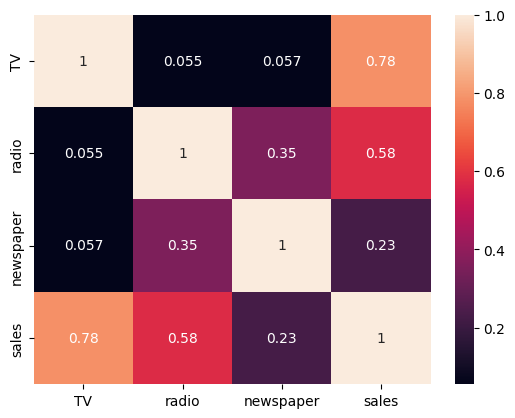

In [4]:
# Чтобы было удобнее ее интерпретировать, передадим параметр annot = True, чтобы отобразить коэффициент корреляции на пересечении признаков.
heatmap_data = sns.heatmap(data=df.corr(numeric_only=True), annot=True)
display(heatmap_data)

# Вывод:
В данных отсутствуют дубликаты и пропуски. Все признаки являются числовыми и представлены в формате чисел с плавающей точкой (float64). Целевой переменной является признак sales.

Поскольку в данных нет категориальных признаков кодирование не требуется, однако данные стоит привести к общему виду (нормализация) для последующей обработи, что будет сделано далее.

TV — ключевой фактор, влияющий на продажи, так как корреляция с sales наиболее высокая (0.78).
Radio также оказывает влияние, но не столь значительное, как TV (0.58).
Newspaper почти не влияет на продажи (0.23), возможно, реклама в газетах менее эффективна. В целом все факторы подходят для задачи.

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)*

In [5]:
# Преобразуем предикторы (все столбцы, кроме sales) в массив NumPy
X = np.array(df.drop(['sales'], axis=1))
# Преобразуем целевую переменную sales в массив NumPy
y = np.array(df['sales'])

# Выводим первые 10
print(f'X: {X[:10]}\n')
print(f'y: {y[:10]}')

X: [[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]]

y: [22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6]


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [6]:
# Добавляем столбец из единиц в начало матрицы X для учета свободного коэффициента в линейной регрессии
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
# Преобразуем y в двумерный массив, что необходимо для корректных вычислений в линейной алгебре
y = y.reshape(-1, 1)

# Выводим размеры матриц X и y
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма** 

Решил нормализовать L-2 с помощью стандартной библиотеки, т.к. это более очевидно для проекта. L-2 сохраняет соотношение между признаками, не искажает их значения.

In [7]:
# X = X / np.sqrt(np.sum(np.square(X), axis=0))

normalizer = Normalizer(norm='l2')
X_normalized = normalizer.fit_transform(X)
print(f'X_normalized: {X_normalized[:10]}')

X_normalized: [[0.00411121 0.94598893 0.15540366 0.28449559]
 [0.01341135 0.5968049  0.5270659  0.60485171]
 [0.01178009 0.20261757 0.54070619 0.81636032]
 [0.0059675  0.90407587 0.24645765 0.3490986 ]
 [0.00525466 0.95004275 0.05675034 0.30687222]
 [0.01111598 0.09670906 0.54357162 0.8336988 ]
 [0.01423448 0.81848233 0.46689079 0.33451017]
 [0.00817375 0.9824853  0.16020559 0.09481555]
 [0.11154575 0.95929342 0.23424607 0.11154575]
 [0.00497659 0.99432228 0.01293913 0.10550366]]


**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии. Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме. Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$


**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [8]:
# Функция координатного спуска для линейной регрессии
def coordinate_descent(X, y, N=1000, tol=0.0001, is_tol=False):
    """Координатный спуск для линейной регрессии

    Args:
        X (ndarray): матрица налюдений
        y (ndarray): вектор истинных значений
        N (int, optional): Количество итерраций. По-умолчанию - 1000
        tol (float): Порог меньше которого прекращается итерации. По-умолчанию 0.0001
        is_tol (bool): Включает / выключает функцию остановки алгоритма. По-умолчанию - False
        
    Returns:
        кортеж: вектор ответов, значения функции потерь (MSE)
    """
    _, n = X.shape  # Количество объектов и признаков (матрица размерностью m, n)
    w = np.zeros((n, 1))  # Создаем нулевой вектор параметров размерность nx1
    
    loss_history = []  # Список для хранения значений функции потерь
    
    for t in range(N):  # Итерации координатного спуска
        for k in range(n):  # Проходим по каждому признаку
            
            # Вычисляем прогноз h без учета k-го признака X[:, k]
            h = X @ w # Обычное предсказание
            h -= X[:, k].reshape(-1, 1) * w[k] # Убираем влияние k-го признака
            
            # Здесь решено добавить проверку на деление на 0
            denom = X[:, k].T @ X[:, k]
            
            if denom != 0:
                # Обновляем k-ый коэффициент w_k
                w[k] = (X[:, k].T @ (y - h)) / denom
        
        # Вычисляем прогноз по всей модели
        y_pred = X @ w
        
        # Вычисляем функцию потерь (MSE)
        mse = np.mean((y - y_pred)**2)
        loss_history.append(mse)
        
        # Критерий остановки: если изменение функции потерь меньше tol
        if is_tol and t > 1 and abs(loss_history[-1] - loss_history[-2]) < tol:
            print(f'Алгоритм остановлен на итерации {t}, так как изменение функции потерь < {tol}')
            break
            
    return w, loss_history

# Инициируем функцию
coord_final_weights, coord_loss_history = coordinate_descent(X_normalized, y, N=1000)

# Выводим результаты
print(f'Вектор w:\n {coord_final_weights}\n')
print(f'Функция потерь (MSE): {round(coord_loss_history[-1], 3)}')

Вектор w:
 [[-229.8391806 ]
 [  15.86104213]
 [  10.57379838]
 [   1.48371979]]

Функция потерь (MSE): 13.868


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [9]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X_normalized, y)

print(model.coef_)

[[-229.8391806    15.86104213   10.57379838    1.48371979]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [10]:
# # Первый вариант (по заданию)
# X = X.apply(lambda x: (x - x.mean()) / x.std())

# print(X.mean())  # Cреднее должно быть около 0
# print(X.std())   # Стандартное отклонения должно быть около 1

# Я бы предпочел использоваться StandardScaler, т.к. он более явно указывает, что мы делаем с данными.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled.mean())  # Cреднее должно быть около 0
print(X_scaled.std())   # Стандартное отклонения должно быть около 1

-2.7200464103316335e-17
0.8660254037844386


**Добавим единичный столбец**

In [11]:
X_scaled = np.hstack([np.ones(X_scaled.shape[0]).reshape(-1, 1), X_scaled])

# Выводим размеры матриц X и y
print(X_scaled.shape, y.shape)

(200, 5) (200, 1)


**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [12]:
# Функуция MSE error (вычисление среднеквадратичной ошибки)
def mse_error(y, y_pred):
    # Вычисляем среднеквадратичную ошибку (MSE)
    mse = np.mean((y - y_pred) ** 2)  # (1/m) * sum((y_i - y_pred_i)^2)
    return mse  # Возвращаем вычисленное значение MSE

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [13]:
# Вычисляем среднее значение продаж
y_mean = y.mean()

# Я так понял, что наивный прогноз предполагает, что все предсказанные значения равны среднему
y_pred_naive = np.full_like(y, y_mean)

mse_naive = mse_error(y, y_pred_naive)
print(f'Среднее значение продаж: {y_mean}') # Близко к нулю
print(f'Значение MSE (наивный прогноз): {mse_naive:.3f}') # Близко к единице

Среднее значение продаж: 14.0225
Значение MSE (наивный прогноз): 27.086


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

Формула получения прогноза: $\hat{y} = X * w$

Где:

- X — матрица предикторов (размерности m×n)
- w — вектор весов (размерности n×1)

- $\hat{y}$ — вектор предсказаний (размерности m×1)

In [14]:
def lin_pred(X, w):
    # Преобразуем w в двумерный массив (если нужно)
    if w.ndim == 1:
        w = w.reshape(-1, 1)

    # Проверяем размерности перед умножением
    if X.shape[1] != w.shape[0]:
        raise ValueError(f"Несовместимые размерности: X {X.shape}, w {w.shape}")
    
    y_hat = X @ w
    return y_hat

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [15]:
# Выполняет один шаг стохастического градиентного спуска (SGD).
def stoch_grad_step(X, y, w, train_ind=0, eta=0.01):
    num_samples, _ = X.shape  # Разделяем на (число объектов, число признаков)
    
    # Выбираем один объект из X и соответствующее значение из y
    x_sample = X[train_ind].reshape(1, -1) # Превращаем строку в 2D (1 x n)
    y_sample = y[train_ind].reshape(1, 1) # Превращаем вектор

    # Вычисляем предсказание для одного объекта
    prediction = x_sample @ w

    # Градиент для текущего объекта
    gradient = (2 / num_samples) * x_sample.T @ (prediction - y_sample)

    # Обновляем веса
    w_new = w - eta * gradient

    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм следующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оcновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [16]:
# Функция стохастического градиентного спуска для линейной регрессии (SGD)
def stochastic_gradient_descent(X, y, initial_weights, alpha=0.01, max_iter=1_000, tol=1e-6):
    """
    Реализация стохастического градиентного спуска (SGD).
    
    Args:
        X (ndarray): Матрица признаков (размер m x n)
        y (ndarray): Вектор истинных значений (размер m x 1)
        initial_weights (ndarray): Начальные веса (размер n x 1)
        alpha (float): Шаг градиентного спуска
        max_iter (int): Максимальное количество итераций
        tol (float): Евклидово расстояние между векторами весов для остановки
    
    Returns:
        tuple: (вектор весов, список значений функции потерь)
    """
    distance = np.inf # Ставим расстояние между высами бесконечность
    loss_history = []  # Список для хранения значений функции потерь (MSE)
    ite = 0 # Счетчик итераций
    num_samples, _ = X.shape # Разделяем на (число объектов, число признаков)
    weights = initial_weights.copy() # Копируем начальные веса, чтобы не менять исходные данные
    
    while distance > tol and ite < max_iter:
        # Генерируем случайный индекс объекта выборки
        rnd_index = np.random.randint(0, num_samples)
        
        # Записываем текущее значение MSE
        curr_prediction = X @ weights
        
        # Записываем текущую ошибку в вектор ошибок
        mse = mse_error(y, curr_prediction)
        loss_history.append(mse)
        
        # Сохраняем старое значение весов
        weights_old = weights.copy()
        
        # Делаем шаг градиентного спуска (новое расстояние)
        weights = stoch_grad_step(X, y, weights, train_ind=rnd_index, eta=alpha)
        
        # Вычисляем евклидово расстояние между новым и старым векторами весов
        distance = sum((weights[i] - weights_old[i])**2 for i in range(len(weights)))**0.5 # ||w_new - w_old||
        
        # Увеличиваем счетчик на 1
        ite += 1
    
    # Выводим результаты итерации
    print(f'Алгоритм закончился на итерации № {ite}, ошибка MSE - {mse:.3f}\n')
    return weights, loss_history

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

Алгоритм закончился на итерации № 8661, ошибка MSE - 2.786



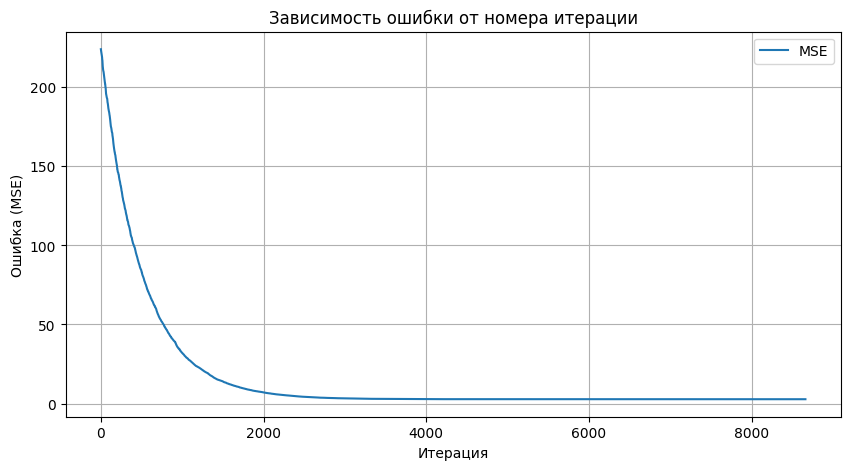

In [17]:
# Начальный вектор весов (нулевой)
w_init = np.zeros((X_scaled.shape[1], 1))

final_weights_sgd, mse_history_sgd = stochastic_gradient_descent(X=X_scaled, 
                                                            y=y, 
                                                            initial_weights=w_init, 
                                                            alpha=0.1,
                                                            max_iter=100_000, 
                                                            tol=1e-6)

# Построение графика MSE от номера итерации
plt.figure(figsize=(10, 5))
plt.plot(range(len(mse_history_sgd)), mse_history_sgd, label="MSE")
plt.xlabel("Итерация")
plt.ylabel("Ошибка (MSE)")
plt.title("Зависимость ошибки от номера итерации")
plt.legend()
plt.grid()
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [18]:
# Выводим итоговые веса
print("Финальные веса после 100_000 итераций:")
print(final_weights_sgd)

Финальные веса после 100_000 итераций:
[[14.00779515]
 [ 0.        ]
 [ 3.90368608]
 [ 2.83843887]
 [-0.04546665]]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [19]:
# Выводим финальный MSE
print("Финальный MSE после 100_000 итераций:")
print(round(mse_history_sgd[-1], 3))

Финальный MSE после 100_000 итераций:
2.786


# Сравнения моделей 'стохастического градиентного спуска' и 'координатного спуска'

Метрики:
- MSE (чем меньше, тем лучше)
- MAE (чем меньше, тем лучше)

In [20]:
# Функция для оценки модели по метрикам MSE и MAE
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f'Оценка модели: {model_name}')
    print(f'MSE (Среднеквадратичная ошибка): {mse:.4f}')
    print(f'MAE (Средняя абсолютная ошибка): {mae:.4f}')
    print('-' * 50)
    
    return mse, mae

# Подставляем веса после обучения координатного спуска:
final_weights_coord = coord_final_weights

# Получаем предсказания для обеих моделей:
y_pred_sgd = lin_pred(X_scaled, final_weights_sgd)  # Предсказания стохастического градиентного спуска
y_pred_coord = lin_pred(X_normalized, final_weights_coord)  # Предсказания координатного спуска

# Оцениваем модели:
mse_sgd, mae_sgd = evaluate_model(y, y_pred_sgd, "Стохастический градиентный спуск (SGD)")
mse_coord, mae_coord = evaluate_model(y, y_pred_coord, "Координатный спуск")

# Создаем таблицу сравнения
comparison_df = pd.DataFrame({
    "Модель": ["Стохастический градиентный спуск (SGD)", "Координатный спуск"],
    "MSE": [mse_sgd, mse_coord],
    "MAE": [mae_sgd, mae_coord]
})

Оценка модели: Стохастический градиентный спуск (SGD)
MSE (Среднеквадратичная ошибка): 2.7865
MAE (Средняя абсолютная ошибка): 1.2513
--------------------------------------------------
Оценка модели: Координатный спуск
MSE (Среднеквадратичная ошибка): 13.8675
MAE (Средняя абсолютная ошибка): 3.0362
--------------------------------------------------


# Финальный вывод:

По моделям:

1. Стохастический градиентный спуск (SGD) показал лучшие результаты. MSE и MAE ниже, что означает более точное предсказание. Это связано с тем, что SGD эффективно обновляет веса. Использование StandardScaler помогло улучшить сходимость.

2. Координатный спуск работает хуже, так как MSE выше. L2-нормализация (Normalizer) могла исказить масштаб данных, что привело к более высоким ошибкам. Возможно, координатный спуск медленнее сходится и требует больше итераций.

Для финального использования модель SGD лучший выбор, так как он дает меньшую ошибку и быстрее обучается, таким образом SGD в данной задаче является более точной и быстрой моделью.